<a href="https://colab.research.google.com/github/Srinithi30/Sales-Forecasting-Challenge/blob/main/Sales_Forecasting_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/data.csv', encoding='latin1')


**Data Understanding & Assumptions**

In [8]:
 df.head() #display first few rows


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df.info() #Show data types and missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
df.describe() #Generate summary statistics (count, mean, std, etc.)

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
df.dropna() #Handle missing values using methods

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [14]:
df.value_counts() #Display frequency counts for categorical variables

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate       UnitPrice  CustomerID  Country       
555524     22698      PINK REGENCY TEACUP AND SAUCER       1         6/5/2011 11:37    2.95       16923.0     United Kingdom    20
           22697      GREEN REGENCY TEACUP AND SAUCER      1         6/5/2011 11:37    2.95       16923.0     United Kingdom    12
572861     22775      PURPLE DRAWERKNOB ACRYLIC EDWARDIAN  12        10/26/2011 12:46  1.25       14102.0     United Kingdom     8
572344     M          Manual                               48        10/24/2011 10:43  1.50       14607.0     United Kingdom     6
541266     21755      LOVE BUILDING BLOCK WORD             1         1/16/2011 16:25   5.95       15673.0     United Kingdom     6
                                                                                                                                ..
553915     21078      SET/20 STRAWBERRY PAPER NAPKINS      12        5/19/2011 19:51   0.85       18225.0     United Kingdom     1
553913     85152      HAND OVER THE CHOCOLATE   SIGN       3         5/19/2011 19:47   2.10       18109.0     United Kingdom     1
           85123A     WHITE HANGING HEART T-LIGHT HOLDER   7         5/19/2011 19:47   2.95       18109.0     United Kingdom     1
           85066      CREAM SWEETHEART MINI CHEST          4         5/19/2011 19:47   12.75      18109.0     United Kingdom     1
553915     21928      JUMBO BAG SCANDINAVIAN BLUE PAISLEY  10        5/19/2011 19:51   2.08       18225.0     United Kingdom     1
Name: count, Length: 401604, dtype: int64

In [17]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
daily_revenue = df.groupby(df['InvoiceDate'].dt.date)['Revenue'].sum()
daily_revenue = daily_revenue.reset_index()
daily_revenue.columns = ['Date', 'Revenue']
daily_revenue.head()


<ipython-input-17-7b595ba27b19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['Quantity'] * df['UnitPrice']
<ipython-input-17-7b595ba27b19>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


,Date,Revenue
0,2010-12-01,46051.26
1,2010-12-02,45775.43
2,2010-12-03,22598.46
3,2010-12-05,31380.60
4,2010-12-06,30465.08


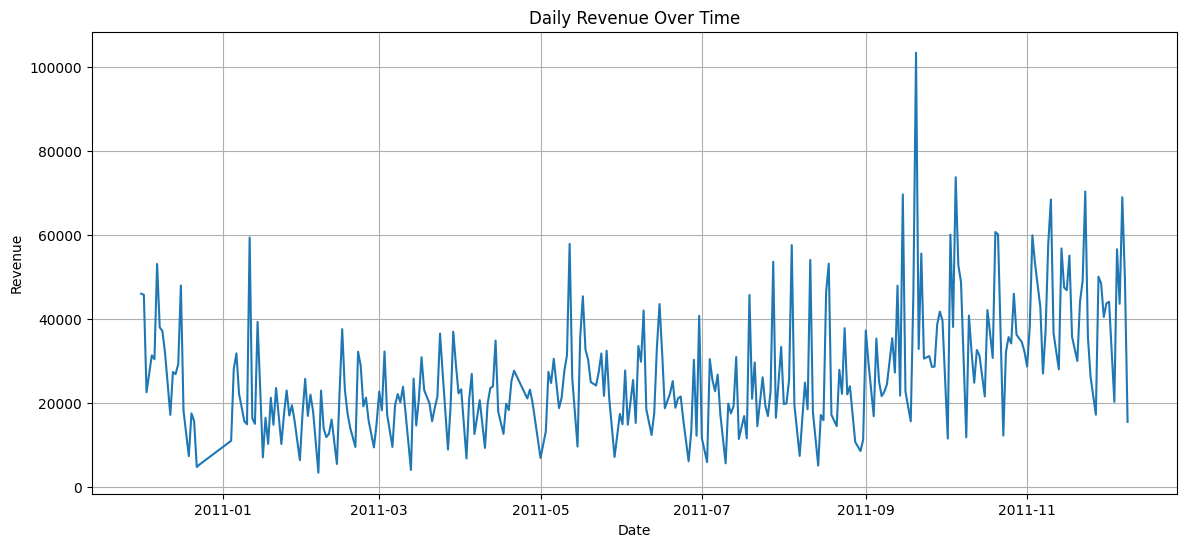

In [18]:
plt.figure(figsize=(14,6))
plt.plot(daily_revenue['Date'], daily_revenue['Revenue'])
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid()
plt.show()


In [19]:
pip install prophet


** Modeling Approach**

Used **Facebook Prophet** for forecasting because it:  
- **Automatically models trend and seasonality**, capturing both weekly shopping patterns and the strong year‐end holiday spike.  
- **Handles missing data and outliers** (e.g., returns or bulk‐buy spikes) without manual intervention.  
- **Provides uncertainty intervals**, enabling risk‐aware planning.  
- **Is easy to configure and interpret**, making it ideal for quickly generating reliable 7-day revenue forecasts.

In [20]:
from prophet import Prophet
df_prophet = daily_revenue.rename(columns={'Date': 'ds', 'Revenue': 'y'})
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpek3d0rur/6bn6pzys.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpek3d0rur/o0lr3diu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87600', 'data', 'file=/tmp/tmpek3d0rur/6bn6pzys.json', 'init=/tmp/tmpek3d0rur/o0lr3diu.json', 'output', 'file=/tmp/tmpek3d0rur/prophet_modelkh9nuo9r/prophet_model-20250428092839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:28:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:28:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Results & Interpretation**

#### Results & Interpretation

- **Historical Fit**: The model tracks past daily revenue closely, with most actuals falling within the 95% confidence band.  
- **7-Day Forecast**:  
  - Predicted daily revenue ranges roughly between **\$32k** and **\$54k**.  
  - Point forecasts (ŷ) show mid-week peaks and weekend dips, mirroring the learned weekly pattern.  
- **Uncertainty**: The 95% interval widens slightly toward Day 7, reflecting typical forecast uncertainty over time.  
- **Seasonal Insights**:  
  - No major holiday spikes in this window—forecasts follow normal weekly seasonality.  
  - Expected Monday/Tuesday upticks and Saturday/Sunday slowdowns.  
- **Business Implications**:  
  - Use these forecasts to align inventory and staffing with expected mid-week demand.  
  - Monitor actuals against the lower bound (risk-averse threshold) to avoid stockouts, and against the upper bound (opportunity threshold) to capitalize on unexpected surges.


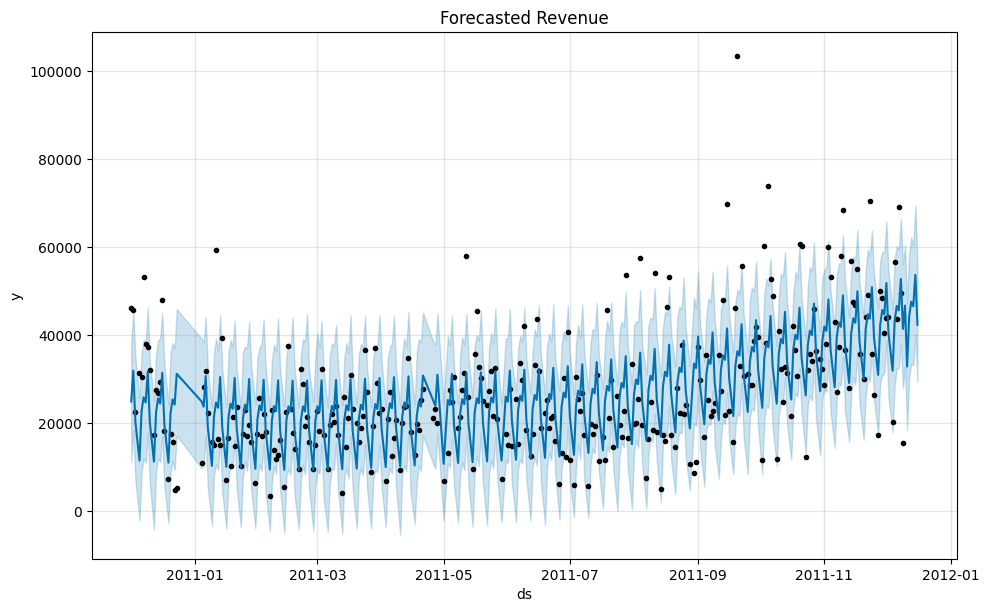

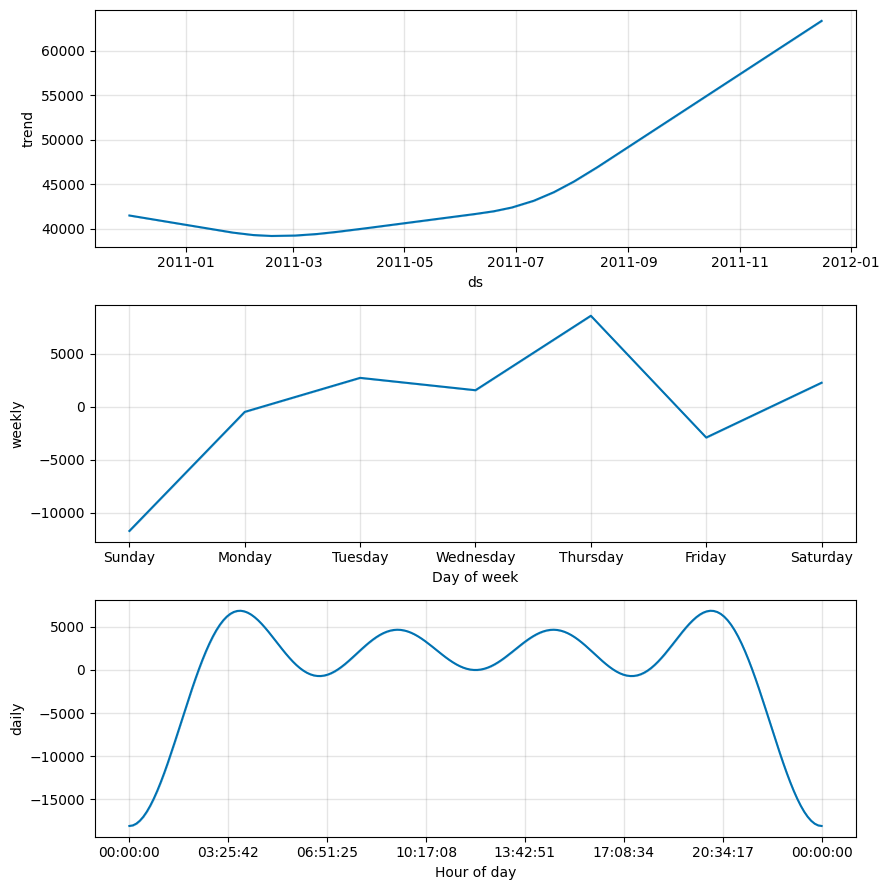

In [21]:
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)
model.plot(forecast)
plt.title('Forecasted Revenue')
plt.show()
model.plot_components(forecast)
plt.show()


In [24]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


,ds,yhat,yhat_lower,yhat_upper
305,2011-12-10,46706.250797,32708.301112,60335.743468
306,2011-12-11,32844.135126,18496.771411,47250.244917
307,2011-12-12,44220.258383,30573.475392,58383.977738
308,2011-12-13,47566.404429,33456.786413,62193.978937
309,2011-12-14,46532.584389,33191.524393,60475.817644
310,2011-12-15,53695.698127,40166.981948,69427.424278
311,2011-12-16,42332.269949,29493.658919,56120.751352
